In [1]:
import networkx as nx
import pandas as pd
import community
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
Ggmuer = nx.read_gexf("Ggmuer.gexf")

In [4]:
netw_df = pd.read_csv("data/network_data_202304111551.csv")

**Clustering code**

In [11]:
random_state = np.random.RandomState(seed=2)

clustering = community.best_partition(Ggmuer, weight='weight', random_state=random_state)

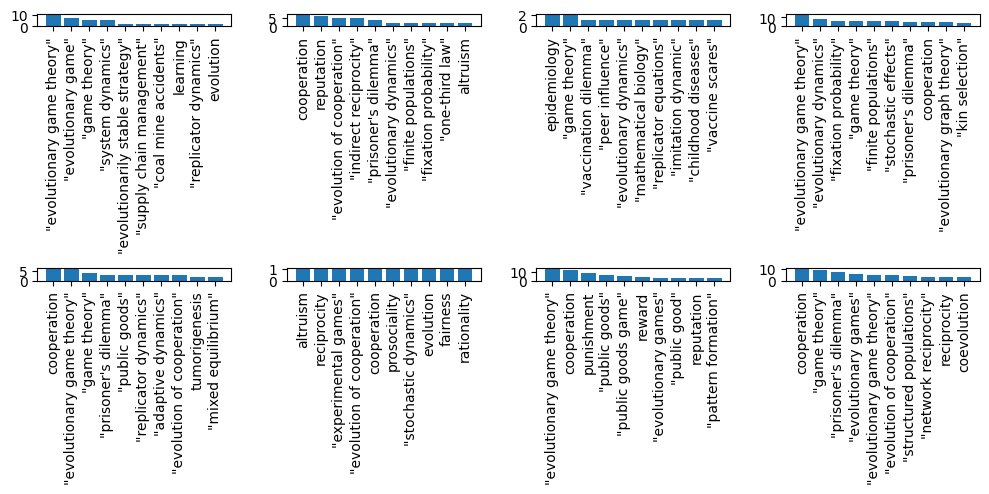

In [78]:
num_clusters = len(set(clustering.values()))

fig, axes = plt.subplots(ncols=4, nrows=int(np.ceil(num_clusters / 4)), figsize=(10, 5))

for i, cluster in enumerate(set(clustering.values())):
    members = [node for node, part in clustering.items() if part == cluster]
    
    netw_df[netw_df['item_id'].isin(members)]['keyword']
    
    members_df = netw_df[netw_df['item_id'].isin(members)]

    keywords = []

    for row_keywords in members_df[~members_df['keyword'].isna()]['keyword']:

        for word in row_keywords.replace("{", "").replace("}", "").split(","):
            keywords.append(word)
            
    index = (int(i / 4), i % 4)
    
    count = collections.Counter(keywords)

    labels, height = zip(*count.most_common(10))
    
    axes[index].bar(labels, height);
    axes[index].set_xticks(labels)
    axes[index].set_xticklabels(labels, rotation=90)
    
fig.tight_layout();

In [84]:
keywords = []

for row_keywords in netw_df[~netw_df['keyword'].isna()]['keyword']:
    for word in row_keywords.replace("{", "").replace("}", "").split(","):
        keywords.append(word)

In [85]:
count = collections.Counter(keywords)

labels, height = zip(*count.most_common(20))

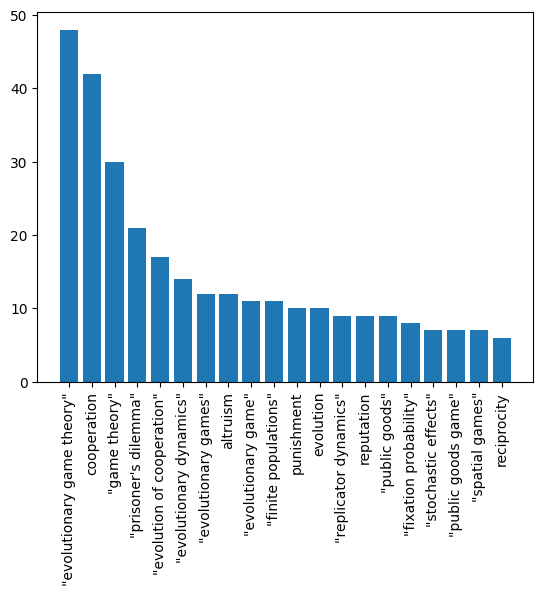

In [89]:
plt.bar(labels, height);

plt.xticks(rotation=90);